## Data read

In [564]:
import pandas as pd

In [565]:
df =pd.read_csv("data.csv")

## data cleaning

info how many column and row

In [566]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         200 non-null    int64  
 1   Order ID       200 non-null    object 
 2   Order Date     200 non-null    object 
 3   Ship Date      200 non-null    object 
 4   Ship Mode      200 non-null    object 
 5   Customer ID    200 non-null    object 
 6   Customer Name  200 non-null    object 
 7   Segment        200 non-null    object 
 8   Country        200 non-null    object 
 9   City           200 non-null    object 
 10  State          200 non-null    object 
 11  Postal Code    199 non-null    float64
 12  Region         200 non-null    object 
 13  Product ID     200 non-null    object 
 14  Category       200 non-null    object 
 15  Sub-Category   200 non-null    object 
 16  Product Name   200 non-null    object 
 17  Sales          200 non-null    float64
dtypes: float64

### we want to read all column

In [567]:
df = pd.DataFrame(df)

In [568]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#### slicing

In [607]:
df[2:5]

,Category,Category_Code
2,A,0
3,C,2
4,B,1


check column to avoid error

In [569]:
column = list(df.columns)
column

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales']

### Drop column that isnot needed

In [570]:
df.drop(columns='Row ID',inplace=True)  


In [571]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


### Check n/a values

In [572]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      1
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### Dropping n/a values and check again

In [573]:
df  =df.dropna(subset=["Postal Code"])

In [574]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### Check duplicate

In [575]:
df.duplicated('Order Date').sum()

107

### Drop duplicate

In [576]:
df.drop_duplicates(subset='Order Date',inplace=True)
df.duplicated('Order Date').sum()

0

### Again check

In [577]:
df.duplicated('Order Date').sum()

0

### Description

In [578]:
df.describe()

,Postal Code,Sales
count,92.000000,92.000000
mean,61238.956522,220.760440
std,28648.674455,413.486777
min,6824.000000,1.248000
25%,41342.250000,19.237500
50%,62878.000000,62.297000
75%,90004.000000,212.248750
max,98115.000000,3083.430000


### If you want to seprate thing by commas

In [579]:
df['Product Name'].str.split(',',expand=True)

,0,1,2,3
0,Bush Somerset Collection Bookcase,None,None,None
2,Self-Adhesive Address Labels for Typewriters b...,None,None,None
3,Bretford CR4500 Series Slim Rectangular Table,None,None,None
5,Eldon Expressions Wood and Plastic Desk Access...,Cherry Wood,None,None
12,Xerox 1967,None,None,None
13,Fellowes PB200 Plastic Comb Binding Machine,None,None,None
14,Holmes Replacement Filter for HEPA Air Cleaner,Very Large Room,HEPA Filter,None
16,Stur-D-Stor Shelving,"Vertical 5-Shelf: 72""H x 36""W x 18 1/2""D",None,None
17,Fellowes Super Stor/Drawer,None,None,None
18,Newell 341,None,None,None


## Data Agregation

### Applying aggregation across all the columns 

In [580]:

df.aggregate(['sum', 'min'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
sum,CA-2017-152156CA-2017-138688US-2016-108966CA-2...,8/11/201712/6/201711/10/20169/6/201515/04/2018...,11/11/201716/06/201718/10/201614/06/201520/04/...,Second ClassSecond ClassStandard ClassStandard...,CG-12520DV-13045SO-20335BH-11710AA-10480IM-150...,Claire GuteDarrin Van HuffSean O'DonnellBrosin...,ConsumerCorporateConsumerConsumerConsumerConsu...,United StatesUnited StatesUnited StatesUnited ...,HendersonLos AngelesFort LauderdaleLos Angeles...,KentuckyCaliforniaFloridaCaliforniaNorth Carol...,5633984.0,SouthWestSouthWestSouthWestCentralCentralWestW...,FUR-BO-10001798OFF-LA-10000240FUR-TA-10000577F...,FurnitureOffice SuppliesFurnitureFurnitureOffi...,BookcasesLabelsTablesFurnishingsPaperBindersAp...,Bush Somerset Collection BookcaseSelf-Adhesive...,20309.9605
min,CA-2015-104269,1/12/2017,1/12/2015,First Class,AA-10480,Alan Dominguez,Consumer,United States,Aurora,Arizona,6824.0,Central,FUR-BO-10001798,Furniture,Accessories,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",1.2480


### We are going to find aggregation for these columns 
This function lets you perform several calculations at once, like getting the total, average, and maximum of a column in one go.

In [581]:

df.aggregate({"Order ID":['sum', 'min'], 
              "Sales":['max', 'min'], 
             }) 

,Order ID,Sales
sum,CA-2017-152156CA-2017-138688US-2016-108966CA-2...,NaN
min,CA-2015-104269,1.248
max,NaN,3083.430


### Common Aggregations with groupby():
Think of it like sorting your data into groups (e.g., by category) and then calculating things like totals or averages for each group.

In [582]:
df.groupby('Category').agg({'Sales': ['sum', 'mean', 'max', 'min']})


Sales                              
                        sum        mean       max     min
Category                                                 
Furniture        10990.0365  523.335071  3083.430  19.300
Office Supplies   6502.1800  112.106552  1113.024   1.248
Technology        2817.7440  216.749538  1097.544  13.980

### Used to summarize and aggregate data with multiple dimensions.
It’s like an Excel pivot table. You can reorganize your data to show summaries by different categories and calculations.

In [583]:
df.pivot_table(values='Sales', index='Category', aggfunc='sum')

,Sales
Category,
Furniture,10990.0365
Office Supplies,6502.1800
Technology,2817.7440


### Apply() – Custom Aggregation Function
Allows applying custom functions to each group.
Lets you write your own function to apply on each row or group of data.

In [584]:
df.groupby('Category')['Sales'].apply(lambda x: x.max() - x.min())


Category
Furniture          3064.130
Office Supplies    1111.776
Technology         1083.564
Name: Sales, dtype: float64

### sum() – Add up values
Adds up all the numbers in a column.

In [585]:
df['Sales'].sum()


20309.960499999997

### mean() – Calculating Average
Finds the average of a numerical column.

In [586]:
df['Sales'].mean()

220.76044021739128

### count() – Counting Rows
Counts the number of non-null values.

In [587]:
df['Sub-Category'].count()

92

 ### median() – Median Value
Calculates the median (middle value) of a column.

In [588]:
df['Sales'].median()

62.297

### std() – Standard Deviation
Computes the standard deviation of a numerical column.

In [589]:
df['Sales'].std()

413.48677675827764

### var() – Variance Calculation
Computes the variance of a numerical column.

In [590]:
df['Sales'].var()

170971.31455394972

### nunique() – Counting Unique Values
Finds the number of unique values in a column.

In [591]:
df['Category'].nunique()

3

## Data preprocessing


### isnull() / notnull() – Check for missing values

#### for missing values

In [592]:
df.isnull().sum() 

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### for non missing values

In [593]:
df.isnull().sum() 

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### Remove rows with any missing value

In [594]:
df.dropna()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
12,CA-2018-114412,15/04/2018,20/04/2018,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520
13,CA-2017-161389,5/12/2017,10/12/2017,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.9760
14,US-2016-118983,22/11/2016,26/11/2016,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100
16,CA-2015-105893,11/11/2015,18/11/2015,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800
17,CA-2015-167164,13/05/2015,15/05/2015,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,Utah,84084.0,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.5000
18,CA-2015-143336,27/08/2015,1/9/2015,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.5600


#### Remove columns with missing values

In [595]:
df.dropna(axis=1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
12,CA-2018-114412,15/04/2018,20/04/2018,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520
13,CA-2017-161389,5/12/2017,10/12/2017,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.9760
14,US-2016-118983,22/11/2016,26/11/2016,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100
16,CA-2015-105893,11/11/2015,18/11/2015,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800
17,CA-2015-167164,13/05/2015,15/05/2015,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,Utah,84084.0,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.5000
18,CA-2015-143336,27/08/2015,1/9/2015,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.5600


#### fillna() – Fill missing values
Fills missing values with a specified value or strategy.

In [596]:
df.fillna(0)  # Replace missing values with 0


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
12,CA-2018-114412,15/04/2018,20/04/2018,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520
13,CA-2017-161389,5/12/2017,10/12/2017,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.9760
14,US-2016-118983,22/11/2016,26/11/2016,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100
16,CA-2015-105893,11/11/2015,18/11/2015,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800
17,CA-2015-167164,13/05/2015,15/05/2015,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,Utah,84084.0,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.5000
18,CA-2015-143336,27/08/2015,1/9/2015,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.5600


### Handling Duplicates
#### duplicated() – Identify duplicate rows


In [597]:
df.duplicated().sum()  # Count duplicate rows

0

#### Checks for duplicate rows in the DataFrame

In [598]:
df.drop_duplicates()  # Remove duplicate rows


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
12,CA-2018-114412,15/04/2018,20/04/2018,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520
13,CA-2017-161389,5/12/2017,10/12/2017,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.9760
14,US-2016-118983,22/11/2016,26/11/2016,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100
16,CA-2015-105893,11/11/2015,18/11/2015,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.8800
17,CA-2015-167164,13/05/2015,15/05/2015,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,Utah,84084.0,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,55.5000
18,CA-2015-143336,27/08/2015,1/9/2015,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109.0,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.5600


### Data Transformation
#### astype() – Convert data types
Converts the data type of columns to a specific type.

In [599]:
df['Customer Name'] = df['Customer Name'].map({'Male': 1, 'Female': 0})  # Convert categorical values to numeric

### rename() – Rename columns
Renames column names for better understanding.

In [600]:
df.rename(columns={'Customer Name': 'name'}, inplace=True)


### Dealing with Outliers
clip() – Limit values within a range
Restrict values to a specified range.

In [601]:
df['Sales'] = df['Sales'].clip(lower=30000, upper=100000)

In [602]:
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
iqr = q3 - q1

### Data Encoding
get_dummies() – One-hot encoding
Converts categorical data into dummy variables.

In [603]:
pd.get_dummies(df, columns=['name'])

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,30000.0
2,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,30000.0
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,30000.0
5,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,30000.0
12,CA-2018-114412,15/04/2018,20/04/2018,Standard Class,AA-10480,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,30000.0
13,CA-2017-161389,5/12/2017,10/12/2017,Standard Class,IM-15070,Consumer,United States,Seattle,Washington,98103.0,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,30000.0
14,US-2016-118983,22/11/2016,26/11/2016,Standard Class,HP-14815,Home Office,United States,Fort Worth,Texas,76106.0,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,30000.0
16,CA-2015-105893,11/11/2015,18/11/2015,Standard Class,PK-19075,Consumer,United States,Madison,Wisconsin,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",30000.0
17,CA-2015-167164,13/05/2015,15/05/2015,Second Class,AG-10270,Consumer,United States,West Jordan,Utah,84084.0,West,OFF-ST-10000107,Office Supplies,Storage,Fellowes Super Stor/Drawer,30000.0
18,CA-2015-143336,27/08/2015,1/9/2015,Second Class,ZD-21925,Consumer,United States,San Francisco,California,94109.0,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,30000.0


### adding column

In [604]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Temperature': ['Hot', 'Cold', 'Warm', 'Cold'],
				})
print(df)
pd.get_dummies(df)


  Temperature
0         Hot
1        Cold
2        Warm
3        Cold


,Temperature_Cold,Temperature_Hot,Temperature_Warm
0,False,True,False
1,True,False,False
2,False,False,True
3,True,False,False


 ### factorize() – Convert categorical values to numeric codes
Encodes labels into numeric values.

In [605]:
import pandas as pd
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A']})
df['Category_Code'] = df['Category'].astype('category').cat.codes

print(df)

  Category  Category_Code
0        A              0
1        B              1
2        A              0
3        C              2
4        B              1
5        C              2
6        A              0


### Data plotting

In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

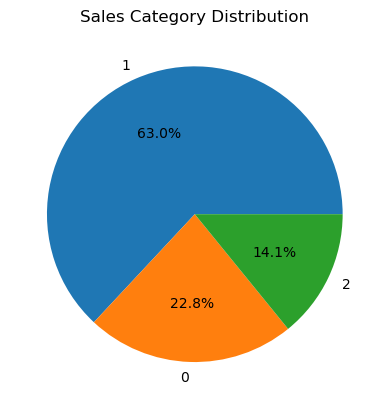

In [105]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Sales Category Distribution')
plt.ylabel('')  # Remove the default y-label
plt.show()


<Axes: xlabel='City'>

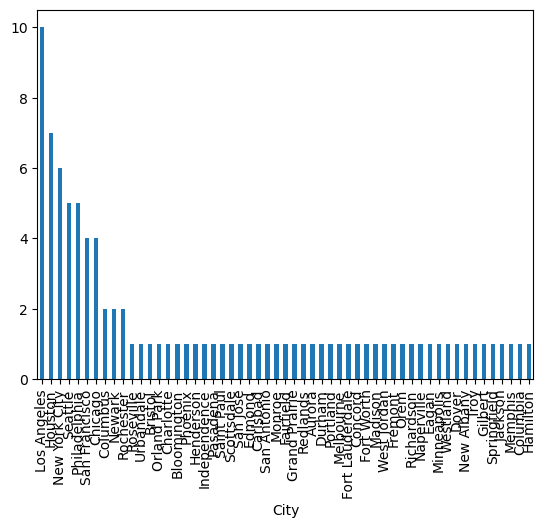

In [106]:
df['City'].value_counts().plot(kind="bar")

<Axes: xlabel='City'>

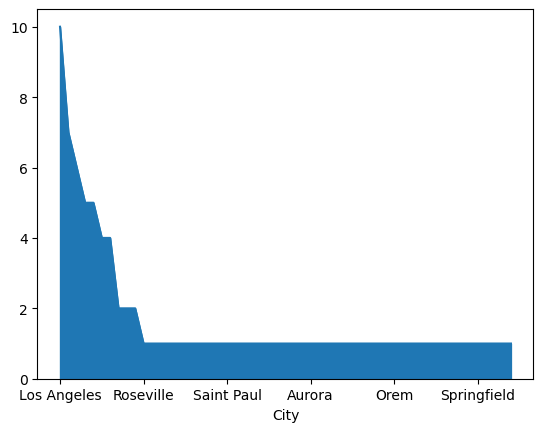

In [107]:
df['City'].value_counts().plot(kind="area")

<Axes: ylabel='Frequency'>

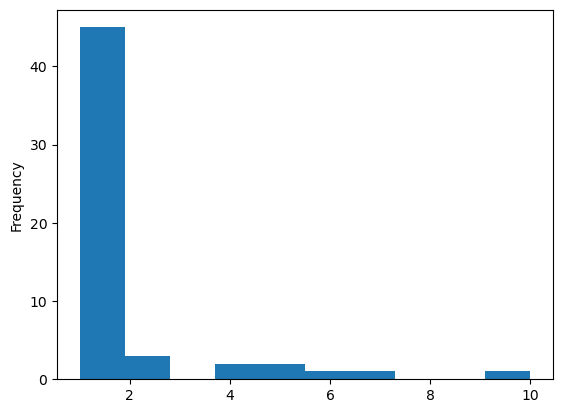

In [108]:
df['City'].value_counts().plot(kind="hist")

<Axes: ylabel='Density'>

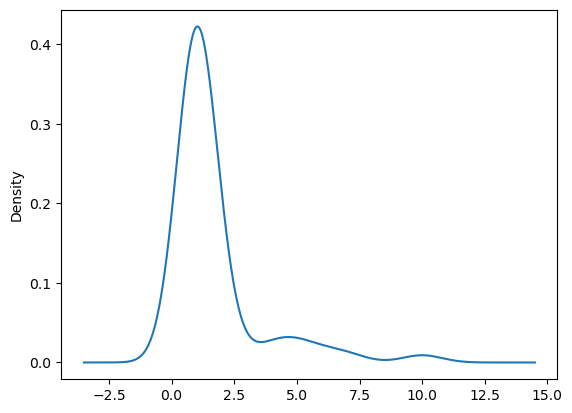

In [109]:
df['City'].value_counts().plot(kind="kde")

<Axes: xlabel='City'>

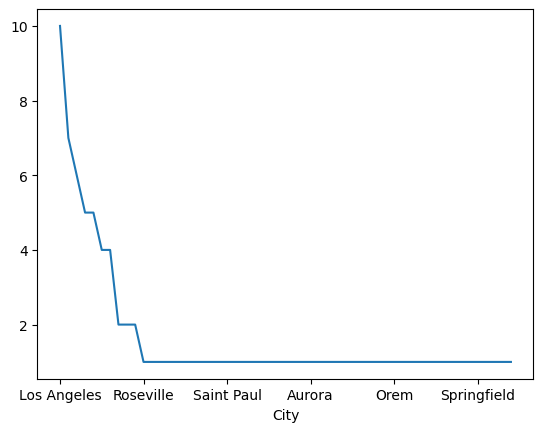

In [110]:
df['City'].value_counts().plot(kind="line")

<Axes: xlabel='City'>

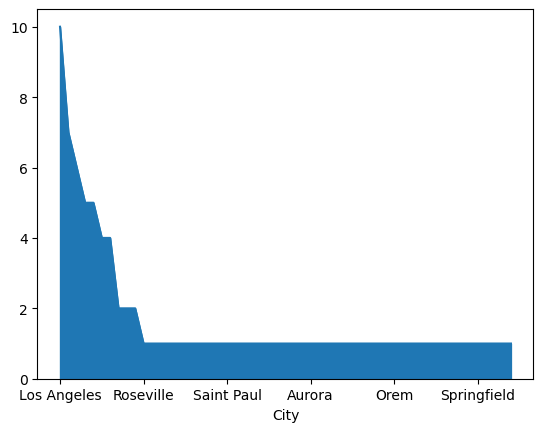

In [112]:
df['City'].value_counts().plot(kind="area")

## saving data

In [432]:
df = pd.DataFrame({'Name': ['ali', 'hamza', 'farhat'],'Roll no':['2340','23412','1233'], 
                   'marks':['77','34',99], 'age':['20','21','22'], 'city':['lahore','islamabad','karachi'],
                   'country':['pakistan','pakistan','pakistan']})
print(df)


     Name Roll no marks age       city   country
0     ali    2340    77  20     lahore  pakistan
1   hamza   23412    34  21  islamabad  pakistan
2  farhat    1233    99  22    karachi  pakistan


In [433]:

df.to_csv('tutorial.csv')
